In [ ]:
!pip install -q numpy
!pip install -q opencv-python
!pip install -q matplotlib
!pip install -q sklearn
!pip install -q cvzone
!pip install -q mediapipe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/img/archive.zip

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/w

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
#Amount sample
n = 2000

In [ ]:
img_cat = []
img_dog = []
img_wild = []
load_train_cat = '/content/afhq/train/cat'
load_train_dog = '/content/afhq/train/dog'
load_train_wild = '/content/afhq/train/wild'

In [ ]:
#เปลี่ยนรูป cat ให้กลายเป็น gray scale 
for filename in os.listdir(load_train_cat):
    img = cv2.imread(os.path.join(load_train_cat,filename)) #ใช้ cv2 
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_cat.append(img1)

In [ ]:
#เปลี่ยนรูป dog ให้กลายเป็น gray scale 
for filename in os.listdir(load_train_dog):
    img = cv2.imread(os.path.join(load_train_dog,filename))
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_dog.append(img1)

In [ ]:
#เปลี่ยนรูป wild ให้กลายเป็น gray scale
for filename in os.listdir(load_train_wild):
    img = cv2.imread(os.path.join(load_train_wild,filename))
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_wild.append(img1)

In [ ]:
len(os.listdir(load_train_cat)),  
len(os.listdir(load_train_dog)),  
len(os.listdir(load_train_wild))

4738

In [ ]:
train_cat_images = np.array(img_cat[:n])
train_dog_images = np.array(img_dog[:n])
train_wild_images = np.array(img_wild[:n])

#Clear ram
images_cat=0
images_dog=0
images_wild=0

In [ ]:
img_cat = []
img_dog = []
img_wild = []
load_test_cat = '/content/afhq/val/cat'
load_test_dog = '/content/afhq/val/dog'
load_test_wild = '/content/afhq/val/wild'

In [ ]:
#เปลี่ยนรูป cat ให้กลายเป็น gray scale 
for filename in os.listdir(load_test_cat):
    img = cv2.imread(os.path.join(load_test_cat,filename))
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_cat.append(img1)

In [ ]:
#เปลี่ยนรูป dog ให้กลายเป็น gray scale 
for filename in os.listdir(load_test_dog):
    img = cv2.imread(os.path.join(load_test_dog,filename))
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_dog.append(img1)

In [ ]:
#เปลี่ยนรูป wild ให้กลายเป็น gray scale 
for filename in os.listdir(load_test_wild):
    img = cv2.imread(os.path.join(load_test_wild,filename))
    if img is not None:
        img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img_wild.append(img1)

In [ ]:
len(os.listdir(load_test_cat)),
len(os.listdir(load_test_dog)),  
len(os.listdir(load_test_wild))

#Clear ram
images_cat=0
images_dog=0
images_wild=0

In [ ]:
test_cat_images = np.array(img_cat)
test_dog_images = np.array(img_dog)
test_wild_images = np.array(img_wild)

In [ ]:
#Raw data -> กำหนดตัวแปรเตรียมเอาไปทำ convert และ decision tree

#For train
tcat_img = train_cat_images
tdog_img = train_dog_images
twild_img = train_wild_images

#For test
tcat_imgt = test_cat_images
tdog_imgt = test_dog_images
twild_imgt = test_wild_images

#Clear ram
test_cat_images=0
test_dog_images=0
test_wild_images=0

In [ ]:
#Data 1D array (x)
list_data = []

for i in range(len(tcat_img)):
    list_data.append(tcat_img[i].flatten())

for i in range(len(tdog_img)):
    list_data.append(tdog_img[i].flatten())

for i in range(len(twild_img)):
    list_data.append(twild_img[i].flatten())

train_animal_data = np.array(list_data)

In [ ]:
#Data target (y)
list_target = []

for i in range(len(tcat_img)):
    list_target.append(1)

for i in range(len(tdog_img)):
    list_target.append(2)

for i in range(len(twild_img)):
    list_target.append(3)

train_animal_target = np.array(list_target)

#Clear ram
list_animal_data=0

In [ ]:
# x และ y ของ train
print(train_animal_data.shape)
print(train_animal_target.shape)

(6000, 262144)
(6000,)


In [ ]:
#Data 1D array (x)
list_data = []

for i in range(len(tcat_imgt)):
    list_data.append(tcat_imgt[i].flatten())

for i in range(len(tdog_imgt)):
    list_data.append(tdog_imgt[i].flatten())

for i in range(len(twild_imgt)):
    list_data.append(twild_imgt[i].flatten())

test_animal_data = np.array(list_data)

#Clear ram
list_animal_target = 0
tcat_images=0
tdog_images=0
twild_images=0

In [ ]:
#Data target (y)
list_target = []

for i in range(len(tcat_imgt)):
    list_target.append(1)

for i in range(len(tdog_imgt)):
    list_target.append(2)

for i in range(len(twild_imgt)):
    list_target.append(3)
    
test_animal_target = np.array(list_target)

#Clear ram
list_animal_data=0

In [ ]:
# x และ y ของ test
print(test_animal_data.shape)
print(test_animal_target.shape)

(1500, 262144)
(1500,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_animal_data,train_animal_target)

DecisionTreeClassifier()

In [ ]:
#เคลียร์ RAM 
train_animal_data=0
train_animal_target=0

In [ ]:
predict_y = model.predict(test_animal_data)

0.5554188895978617
[[276 105 119]
 [100 302  98]
 [110 134 256]]


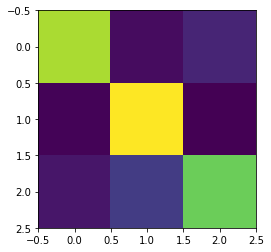

In [ ]:
print(f1_score(test_animal_target,predict_y,average='macro'))
print(confusion_matrix(test_animal_target,predict_y))
plt.imshow(confusion_matrix(test_animal_target,predict_y))

#Output แสดงให้เห็นว่า accuracy = 0.55

AxesImage(54,36;334.8x217.44) 

This image is a wild


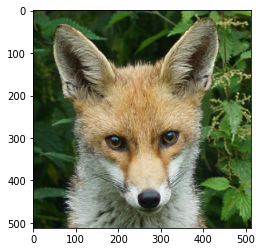

In [ ]:
#เอาภาพจาก Folder train มาใส่
path = "/content/afhq/train/wild/flickr_wild_000034.jpg"
load_images = cv2.imread(path)
images = cv2.cvtColor(load_images,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(load_images,cv2.COLOR_BGR2GRAY)
resize_img_gray = cv2.resize(img_gray,(512,512))
convert_resize_img_gray = resize_img_gray.flatten()
finalimg = np.array([convert_resize_img_gray])
c = model.predict(finalimg)
if c[0] == 1:
  print(plt.imshow(images),'\n')
  print('This image is a cat')
elif c[0] == 2:
  print(plt.imshow(images),'\n')
  print('This image is a dog')
else:
  print(plt.imshow(images),'\n')
  print('This image is a wild')